In [258]:
import pyspark as ps
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('crime_data')
         .getOrCreate()
        )
sc = spark.sparkContext

In [4]:
!pwd

/home/jovyan/work/Capstone 1/CA-Violent-Crime


In [60]:
spark_arrests = spark.read.csv('data/DOJ_ArrestData1980-2019.csv',
                    header=True,
                    quote='"',
                    sep=",",
                    inferSchema=True)

In [42]:
spark_df.createOrReplaceTempView('arrests_tempview')

In [81]:
query = '''
select YEAR, COUNTY, SUM(VIOLENT) AS violent_crime_arrests
from arrests_tempview
where YEAR > 2002
and COUNTY != 'San Francisco County'
GROUP BY YEAR, COUNTY
ORDER BY YEAR, COUNTY
'''

arrests_sql = spark.sql(query)
arrests_sql.show()
arrests_pd = arrests_sql.toPandas()

+----+-------------------+---------------------+
|YEAR|             COUNTY|violent_crime_arrests|
+----+-------------------+---------------------+
|2003|     Alameda County|                 4749|
|2003|      Alpine County|                    7|
|2003|      Amador County|                   92|
|2003|       Butte County|                  571|
|2003|   Calaveras County|                  166|
|2003|      Colusa County|                   83|
|2003|Contra Costa County|                 2482|
|2003|   Del Norte County|                  154|
|2003|   El Dorado County|                  614|
|2003|      Fresno County|                 4939|
|2003|       Glenn County|                  113|
|2003|    Humboldt County|                  534|
|2003|    Imperial County|                  640|
|2003|        Inyo County|                   61|
|2003|        Kern County|                 3746|
|2003|       Kings County|                  677|
|2003|        Lake County|                  319|
|2003|      Lassen C

In [300]:
arrests_pd.head(10)

,YEAR,COUNTY,violent_crime_arrests
0,2003,Alameda County,4749
1,2003,Alpine County,7
2,2003,Amador County,92
3,2003,Butte County,571
4,2003,Calaveras County,166
5,2003,Colusa County,83
6,2003,Contra Costa County,2482
7,2003,Del Norte County,154
8,2003,El Dorado County,614
9,2003,Fresno County,4939


In [20]:
spark_capita = spark.read.csv('data/County_Expenditures_Per_Capita.csv',
                    header=True,
                    quote='"',
                    sep=",",
                    inferSchema=True)

In [21]:
spark_capita.createOrReplaceTempView('capita_tempview')

In [77]:
query = '''
select `Fiscal Year` as Year, `Entity Name` as County, `Estimated Population` AS Estimated_Population
from capita_tempview
ORDER BY Year, County
'''

capita_sql = spark.sql(query)
capita_sql.show()
capita_pd = capita_sql.toPandas()

+----+------------+--------------------+
|Year|      County|Estimated_Population|
+----+------------+--------------------+
|2003|     Alameda|             1496218|
|2003|      Alpine|                1208|
|2003|      Amador|               36523|
|2003|       Butte|              210367|
|2003|   Calaveras|               42458|
|2003|      Colusa|               19700|
|2003|Contra Costa|              994908|
|2003|   Del Norte|               27848|
|2003|   El Dorado|              166030|
|2003|      Fresno|              841423|
|2003|       Glenn|               27071|
|2003|    Humboldt|              128347|
|2003|    Imperial|              150909|
|2003|        Inyo|               18351|
|2003|        Kern|              702873|
|2003|       Kings|              136108|
|2003|        Lake|               61307|
|2003|      Lassen|               34955|
|2003| Los Angeles|             9979618|
|2003|      Madera|              131168|
+----+------------+--------------------+
only showing top

In [298]:
capita_pd.head(10)

,Year,County,Estimated_Population
0,2003,Alameda,1496218
1,2003,Alpine,1208
2,2003,Amador,36523
3,2003,Butte,210367
4,2003,Calaveras,42458
5,2003,Colusa,19700
6,2003,Contra Costa,994908
7,2003,Del Norte,27848
8,2003,El Dorado,166030
9,2003,Fresno,841423


In [57]:
query = '''
select YEAR, COUNTY, SUM(VIOLENT) AS violent_crime_arrests
from arrests_tempview
where YEAR > 2002
LEFT JOIN (select `Fiscal Year` as Year, `Entity Name` as County, `Estimated Population` AS Estimated_Population
from capita_tempview)
ON 
GROUP BY YEAR, COUNTY
ORDER BY violent_crime_arrests DESC
limit 100
'''

crime_per_capita_sql = spark.sql(query)
crime_per_capita_sql.show()

ParseException: 
mismatched input 'LEFT' expecting {<EOF>, ';'}(line 5, pos 0)

== SQL ==

select YEAR, COUNTY, SUM(VIOLENT) AS violent_crime_arrests
from arrests_tempview
where YEAR > 2002
LEFT JOIN (select `Fiscal Year` as Year, `Entity Name` as County, `Estimated Population` AS Estimated_Population
^^^
from capita_tempview)
ON 
GROUP BY YEAR, COUNTY
ORDER BY violent_crime_arrests DESC
limit 100


In [59]:
spark_capita.show()

+-----------+-----------+------------------+--------------------+-----------------------+
|Entity Name|Fiscal Year|Total Expenditures|Estimated Population|Expenditures Per Capita|
+-----------+-----------+------------------+--------------------+-----------------------+
|    Alameda|       2019|        3339008906|             1669301|                   2000|
|    Alameda|       2018|        2937009130|             1660202|                   1769|
|    Alameda|       2017|        2834852878|             1645359|                   1723|
|    Alameda|       2016|        2466628582|             1627865|                   1515|
|    Alameda|       2015|        2462509900|             1594569|                   1544|
|    Alameda|       2014|        2405508090|             1573254|                   1529|
|    Alameda|       2013|        2295382137|             1548681|                   1482|
|    Alameda|       2012|        2221267982|             1532137|                   1450|
|    Alame

In [61]:
spark_arrests.show()

+----+------+--------+-----------+--------------+-------+--------+---------+--------+----------+-------+-------+-------+
|YEAR|GENDER|    RACE|  AGE_GROUP|        COUNTY|VIOLENT|PROPERTY|F_DRUGOFF|F_SEXOFF|F_ALLOTHER|F_TOTAL|M_TOTAL|S_TOTAL|
+----+------+--------+-----------+--------------+-------+--------+---------+--------+----------+-------+-------+-------+
|1980|  Male|   Black|   Under 18|Alameda County|    505|    1351|      188|      26|        79|   2149|   2286|    295|
|1980|  Male|   Black|   18 to 19|Alameda County|    205|     465|      183|       8|        48|    909|   1333|      0|
|1980|  Male|   Black|   20 to 29|Alameda County|    949|    1593|      606|      27|       178|   3353|   7974|      0|
|1980|  Male|   Black|   30 to 39|Alameda County|    450|     755|      241|      18|       110|   1574|   4876|      0|
|1980|  Male|   Black|   40 to 69|Alameda County|    172|     218|      117|      11|        66|    584|   3836|      0|
|1980|  Male|   Black|70 and ove

In [113]:
combine = arrests_pd.join(capita_pd)

In [123]:
combine['COUNTY'] = combine['County']
#combine.drop('Year', axis=1, inplace=True)
#combine.drop('County', axis=1, inplace=True)
combine.head(20)

,YEAR,COUNTY,violent_crime_arrests,Estimated_Population
0,2003,Alameda,4749,1496218
1,2003,Alpine,7,1208
2,2003,Amador,92,36523
3,2003,Butte,571,210367
4,2003,Calaveras,166,42458
5,2003,Colusa,83,19700
6,2003,Contra Costa,2482,994908
7,2003,Del Norte,154,27848
8,2003,El Dorado,614,166030
9,2003,Fresno,4939,841423


In [124]:
combine['arrests_per_capita'] = combine['violent_crime_arrests'] / combine['Estimated_Population']

In [125]:
combine.rename(columns = {'YEAR': 'Year', 'COUNTY': 'County', 'violent_crime_arrests': 'Violent Crime Arrests', 'arrests_per_capita': 'Arrests Per Capita', 'Estimated_Population': 'Estimated Population'}, inplace=True)

In [256]:
#combine.to_csv('Combined DataFrame Violent Crime Per Capita by County.csv')

In [290]:
crime_dict = {}
for county in combine['County'].unique():
    crime_dict[county] = list(combine[combine.County==county]['Arrests Per Capita'].values)

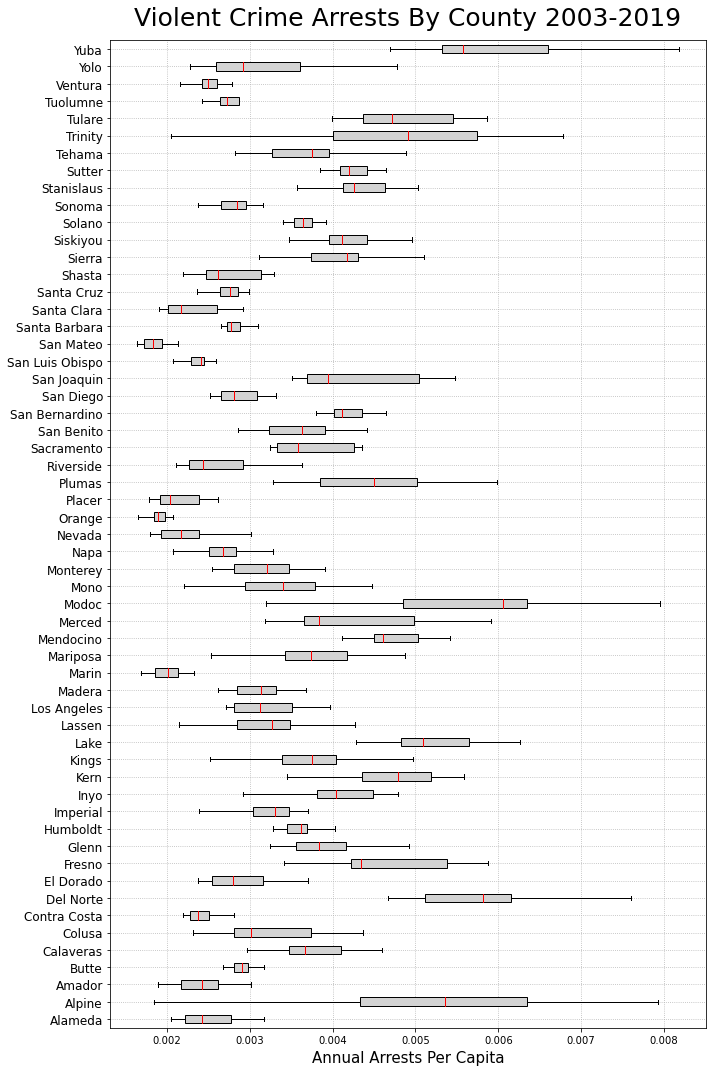

In [296]:
fig, ax = plt.subplots(figsize=(10, 15))
ax.boxplot(crime_dict.values(), vert=False, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor='lightgrey', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='red', markeredgecolor='red'),
            medianprops=dict(color='red'))

ax.set_yticklabels(crime_dict.keys(), fontsize=12)
ax.set_xlabel('Annual Arrests Per Capita', fontsize=15, labelpad=5)
ax.set_title('Violent Crime Arrests By County 2003-2019', fontsize=25, pad=15)
ax.grid(linestyle=':')
fig.tight_layout()
#plt.savefig('crime_boxplot')

In [260]:
budget_df = pd.read_csv('data/Combined Spending Data.csv')

In [265]:
budget_per_capita = budget_df.join(capita_pd)

In [284]:
#budget_per_capita.drop('County', axis=1, inplace=True)
#budget_per_capita.drop('Year', axis=1, inplace=True)
#budget_per_capita.rename(columns = {'Entity Name':'County', 'Fiscal Year':'Year'}, inplace=True)
budget_per_capita['Police Spending Per Capita'] = budget_per_capita['Police Protection_Total'] / budget_per_capita['Estimated_Population']
budget_per_capita['Mental Health Spending Per Capita'] = budget_per_capita['Mental Health_Total'] / budget_per_capita['Estimated_Population']
budget_per_capita['Drug and Alcohol Abuse Services Spending Per Capita'] = budget_per_capita['Drug and Alcohol Abuse Services_Total'] / budget_per_capita['Estimated_Population']

In [430]:
budget_per_capita.head(5)

,County,Year,Police Protection_Total,Mental Health_Total,Drug and Alcohol Abuse Services_Total,Estimated_Population,Police Spending Per Capita,Mental Health Spending Per Capita,Drug and Alcohol Abuse Services Spending Per Capita
0,Alameda,2003,67620724,162111429.0,28910904.0,1496218,45.194433,108.347466,19.322655
1,Alpine,2003,1610553,148701.0,500356.0,1208,1333.239238,123.096854,414.201987
2,Amador,2003,5715469,1885165.0,849770.0,36523,156.489582,51.615831,23.266709
3,Butte,2003,11450959,28935820.0,4019764.0,210367,54.433248,137.549235,19.108339
4,Calaveras,2003,5672737,2007571.0,875481.0,42458,133.608201,47.283692,20.619930


In [294]:
police_dict = {}
for county in budget_per_capita['County'].unique():
    police_dict[county] = list(budget_per_capita[budget_per_capita.County==county]['Police Spending Per Capita'].values)

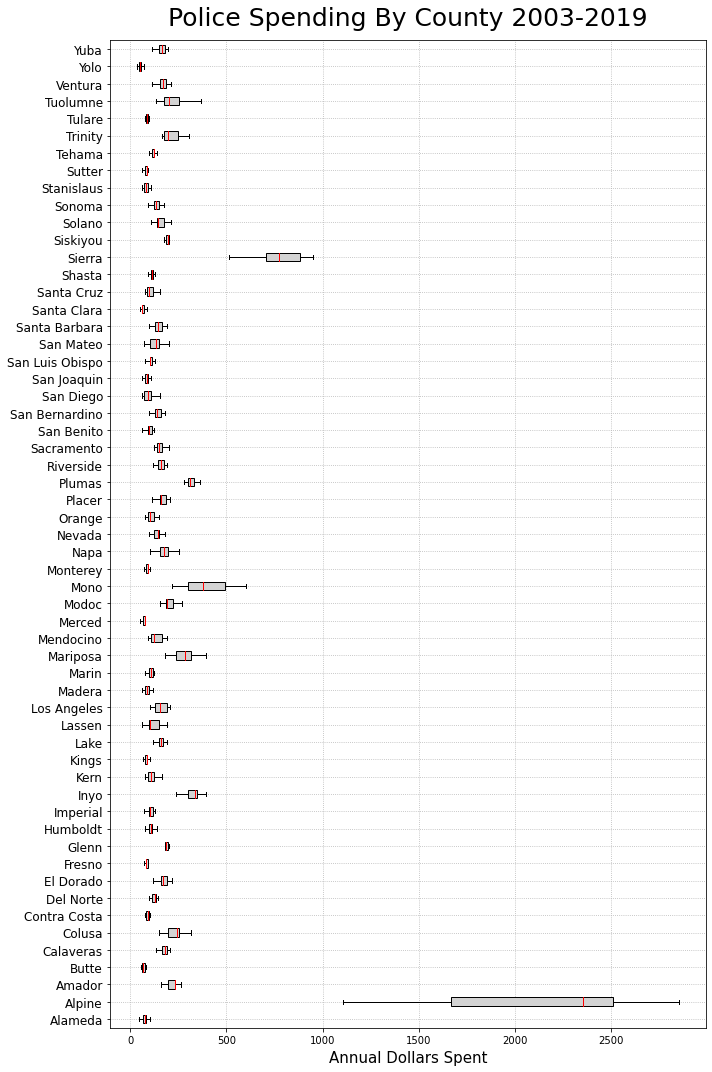

In [297]:
fig, ax = plt.subplots(figsize=(10, 15))
ax.boxplot(police_dict.values(), vert=False, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor='lightgrey', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='red', markeredgecolor='red'),
            medianprops=dict(color='red'))

ax.set_yticklabels(police_dict.keys(), fontsize=12)
ax.set_xlabel('Annual Dollars Spent', fontsize=15, labelpad=5)
ax.set_title('Police Spending By County 2003-2019', fontsize=25, pad=15)
ax.grid(linestyle=':')
fig.tight_layout()

In [302]:
spark_SF_budget = spark.read.csv('data/SF_Spending_and_Revenue.csv',
                    header=True,
                    quote='"',
                    sep=",",
                    inferSchema=True)

In [303]:
spark_SF_budget.createOrReplaceTempView('SF_budget_tempview')

In [342]:
query = '''
select `Fiscal Year`, CAST(CAST(SUM(Amount)  AS FLOAT) AS bigint)
from SF_budget_tempview
WHERE `Fiscal Year` >2002
AND `Fiscal Year` <2020
AND `Organization Group` = 'Public Protection'
AND `Revenue or Spending` = 'Spending'
AND `Department` IN ('POL Police','SHF Sheriff')
GROUP BY `Fiscal Year`
ORDER BY `Fiscal Year`
'''

SF_police_sql = spark.sql(query)
SF_police_sql.show(30, truncate=False)
SF_police_spending_pd = SF_budget_sql.toPandas()

+-----------+------------------------------------------+
|Fiscal Year|CAST(CAST(sum(Amount) AS FLOAT) AS BIGINT)|
+-----------+------------------------------------------+
|2003       |415022912                                 |
|2004       |392062720                                 |
|2005       |436628928                                 |
|2006       |476193280                                 |
|2007       |511576000                                 |
|2008       |564828992                                 |
|2009       |561304704                                 |
|2010       |581817280                                 |
|2011       |581379712                                 |
|2012       |606876032                                 |
|2013       |640512384                                 |
|2014       |663445440                                 |
|2015       |683165504                                 |
|2016       |724263872                                 |
|2017       |764019712         

In [343]:
SF_police_spending_pd.rename(columns = {'Fiscal Year':'Year','CAST(CAST(sum(Amount) AS FLOAT) AS BIGINT)':'Police Protection Total'}, inplace=True)
SF_police_spending_pd

,Year,Police Protection Total
0,2003,415022912
1,2004,392062720
2,2005,436628928
3,2006,476193280
4,2007,511576000
5,2008,564828992
6,2009,561304704
7,2010,581817280
8,2011,581379712
9,2012,606876032


In [404]:
query = '''
SELECT `Fiscal Year`, CAST(CAST(SUM(Amount)  AS FLOAT) AS bigint)
FROM SF_budget_tempview
WHERE `Fiscal Year` >2002
AND `Fiscal Year` <2020
AND `Revenue or Spending` = 'Spending'
AND `Organization Group` = 'Community Health'
AND `Program` LIKE '%Mental Health%'
GROUP BY `Fiscal Year`
ORDER BY `Fiscal Year`
'''

SF_mentalhealth_sql = spark.sql(query)
SF_mentalhealth_sql.show(100, truncate=False)
SF_mentalhealth_spending_pd = SF_mentalhealth_sql.toPandas()

+-----------+------------------------------------------+
|Fiscal Year|CAST(CAST(sum(Amount) AS FLOAT) AS BIGINT)|
+-----------+------------------------------------------+
|2003       |135234576                                 |
|2004       |139081552                                 |
|2005       |130239568                                 |
|2006       |163849216                                 |
|2007       |164021088                                 |
|2008       |192835696                                 |
|2009       |200688256                                 |
|2010       |207211728                                 |
|2011       |200369952                                 |
|2012       |230805712                                 |
|2013       |229449648                                 |
|2014       |226420448                                 |
|2015       |236785440                                 |
|2016       |241251248                                 |
|2017       |248880240         

In [407]:
SF_mentalhealth_spending_pd.rename(columns = {'Fiscal Year':'Year','CAST(CAST(sum(Amount) AS FLOAT) AS BIGINT)':'Mental Health Total'}, inplace=True)
SF_mentalhealth_spending_pd

,Year,Mental Health Total
0,2003,135234576
1,2004,139081552
2,2005,130239568
3,2006,163849216
4,2007,164021088
5,2008,192835696
6,2009,200688256
7,2010,207211728
8,2011,200369952
9,2012,230805712


In [401]:
query = '''
SELECT `Fiscal Year`, `Organization Group`, `Program`, `Character`, `Object`, `Sub-object`, `Amount`
FROM SF_budget_tempview
WHERE `Fiscal Year` =2018
AND `Revenue or Spending` = 'Spending'
AND `Organization Group` = 'Human Welfare & Neighborhood Development'
AND `Object` LIKE '%Mental%'
'''

SF_mentalhealth_sql = spark.sql(query)
SF_mentalhealth_sql.show(50, truncate=False)

+-----------+----------------------------------------+--------------+-----------------------+----------------+----------------+----------+
|Fiscal Year|Organization Group                      |Program       |Character              |Object          |Sub-object      |Amount    |
+-----------+----------------------------------------+--------------+-----------------------+----------------+----------------+----------+
|2018       |Human Welfare & Neighborhood Development|Operating     |Services Of Other Depts|GF-Mental Health|GF-Mental Health|253720.17 |
|2018       |Human Welfare & Neighborhood Development|Operating     |Services Of Other Depts|GF-Mental Health|GF-Mental Health|16596.25  |
|2018       |Human Welfare & Neighborhood Development|Operating     |Services Of Other Depts|GF-Mental Health|GF-Mental Health|472471.04 |
|2018       |Human Welfare & Neighborhood Development|Operating     |Services Of Other Depts|GF-Mental Health|GF-Mental Health|1432761.66|
|2018       |Human Welfare 

In [419]:
query = '''
SELECT `Fiscal Year`, `Organization Group`, `Program`, `Character`, `Object`, `Sub-object`, `Amount`
FROM SF_budget_tempview
WHERE `Fiscal Year` =2018
AND `Revenue or Spending` = 'Spending'
AND `Department` = 'DPH Public Health'
AND `Sub-object` LIKE '%Mental%'
'''

SF_mentalhealth_sql = spark.sql(query)
SF_mentalhealth_sql.show(200, truncate=False)

+-----------+------------------+-------+---------+------+----------+------+
|Fiscal Year|Organization Group|Program|Character|Object|Sub-object|Amount|
+-----------+------------------+-------+---------+------+----------+------+
+-----------+------------------+-------+---------+------+----------+------+



In [434]:
query = '''
SELECT `Fiscal Year`, CAST(CAST(SUM(Amount)  AS FLOAT) AS bigint)
FROM SF_budget_tempview
WHERE `Organization Group` IN ('Community Health','Human Welfare & Neighborhood Development')
AND `Department` IN ('DPH Public Health','HSA Human Services Agency','HOM HOMELESSNESS SERVICES','HOM Homelessness Services')
AND `Program` LIKE '%Substance%'
AND `Fiscal Year` >2002
GROUP BY `Fiscal Year`
ORDER BY `Fiscal Year`
'''

SF_substanceabuse_sql = spark.sql(query)
SF_substanceabuse_sql.show(200, truncate=False)
SF_substanceabuse_spending_pd = SF_substanceabuse_sql.toPandas()

+-----------+------------------------------------------+
|Fiscal Year|CAST(CAST(sum(Amount) AS FLOAT) AS BIGINT)|
+-----------+------------------------------------------+
|2003       |90139488                                  |
|2004       |79444336                                  |
|2005       |81215624                                  |
|2006       |84249336                                  |
|2007       |86236736                                  |
|2008       |87320744                                  |
|2009       |87116456                                  |
|2010       |81603496                                  |
|2011       |80663112                                  |
|2012       |82183552                                  |
|2013       |82902256                                  |
|2014       |82328008                                  |
|2015       |88719288                                  |
|2016       |89841632                                  |
|2017       |77201736          

In [436]:
SF_substanceabuse_spending_pd.rename(columns = {'Fiscal Year':'Year','CAST(CAST(sum(Amount) AS FLOAT) AS BIGINT)':'Substance Abuse Total'}, inplace=True)
SF_substanceabuse_spending_pd

,Year,Substance Abuse Total
0,2003,90139488
1,2004,79444336
2,2005,81215624
3,2006,84249336
4,2007,86236736
5,2008,87320744
6,2009,87116456
7,2010,81603496
8,2011,80663112
9,2012,82183552


In [452]:
SF_spending_pd = SF_police_spending_pd.join(SF_mentalhealth_spending_pd, how='right', rsuffix='2')
SF_spending_pd = SF_spending_pd.join(SF_substanceabuse_spending_pd, rsuffix='3')
SF_spending_pd.drop(columns=['Year2', 'Year3'])

,Year,Police Protection Total,Mental Health Total,Substance Abuse Total
0,2003,415022912,135234576,90139488
1,2004,392062720,139081552,79444336
2,2005,436628928,130239568,81215624
3,2006,476193280,163849216,84249336
4,2007,511576000,164021088,86236736
5,2008,564828992,192835696,87320744
6,2009,561304704,200688256,87116456
7,2010,581817280,207211728,81603496
8,2011,581379712,200369952,80663112
9,2012,606876032,230805712,82183552
